# Execrice 2 : NLP/Text classification

Our goal is to build a model able to predict the category of a given text (business, sport, politics, entertainment, tech)

## I. Data preprocessing :

### 1) Load the dataset


In [0]:
!pip install -q kaggle

To get your API :
go to [Kaggle.com](https://www.kaggle.com/) --> my account (top right click on the profile pic) --> scroll down to "create API token" 

In [0]:
from google.colab import files
uploaded = files.upload() #upload the .json file to the colab

Saving kaggle.json to kaggle.json


In [0]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory


In [0]:
!cp kaggle.json /root/.kaggle
!kaggle datasets download -d datacolab/news-classification

  0% 0.00/1.85M [00:00<?, ?B/s]
100% 1.85M/1.85M [00:00<00:00, 62.0MB/s]


In [0]:
import pandas as pd

df = pd.read_csv('news-classification.zip', compression='zip', encoding = "ISO-8859-1", sep=',',error_bad_lines=False)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df.head()

,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business


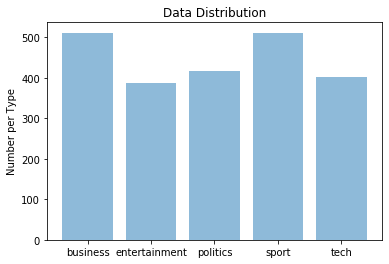

[510, 386, 417, 511, 401]


In [0]:
objects = ('business', 'entertainment', 'politics', 'sport', 'tech')
y_pos = np.arange(len(objects))
performance = [len(df.loc[df.type=="business"]),len(df.loc[df.type=="entertainment"]),len(df.loc[df.type=="politics"]),len(df.loc[df.type=="sport"]),len(df.loc[df.type=="tech"])]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number per Type')
plt.title('Data Distribution')
 
plt.show()
print(performance)

### Import Libraries

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize as wt
from nltk.tokenize import punkt
from nltk.stem import PorterStemmer
from collections import defaultdict
from nltk.corpus import wordnet
from nltk import pos_tag
from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Lowcase

In [0]:
df.news = df.news.apply(str.lower)

### 2) Remove stop words


In [0]:
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def StopwordRm(text):
    filtred_text=''
    for word in text.split():
        if word not in stopwords:
            filtred_text = filtred_text + word+ ' '
    return filtred_text

In [0]:
df.news = df.news.apply(StopwordRm)

In [0]:
df.head()

,news,type
0,china role yukos split-up china lent russia $6...,business
1,oil rebounds weather effect oil prices recover...,business
2,indonesia 'declines debt freeze' indonesia lon...,business
3,$1m payoff former shell boss shell pay $1m (â£...,business
4,us bank $515m sec settlement five bank america...,business


### 3) Remove  indesired ponctuation 


In [0]:
import string
punkt = list(string.punctuation)

In [0]:
def PunctRm(text):
    filtred_text = ''
    for x in text:
      if x not in punkt:
            filtred_text = filtred_text + x
    return filtred_text

In [0]:
df.news = df.news.apply(PunctRm)

### 4) Words lemmatization


In [0]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [0]:
lemmatizer = WordNetLemmatizer()

In [0]:
def Lemmetizer(text):
  filtred_text = ''
  for word in text.split():
          filtred_text = filtred_text + lemmatizer.lemmatize(word, get_wordnet_pos(word)) + ' '
  return filtred_text

In [0]:
df.news = df.news.apply(Lemmetizer)

In [0]:
df.head()

,news,type
0,china role yukos splitup china lent russia 6bn...,business
1,oil rebound weather effect oil price recover a...,business
2,indonesia decline debt freeze indonesia longer...,business
3,1m payoff former shell bos shell pay 1m â£5220...,business
4,u bank 515m sec settlement five bank america s...,business


### 5) One-hot encoding


In [0]:
onehot_encoder = OneHotEncoder(sparse=False)

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.type)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


### 6) Split the dataset for training and testing


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.news, onehot_encoded, test_size = 0.2,random_state=42)

### 7) Words vectorization

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer(num_words=25000)

In [0]:
tokenizer.fit_on_texts(x_train.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 25351 unique tokens.


In [0]:
X_Train = tokenizer.texts_to_sequences(x_train.values)
X_Train = pad_sequences(X_Train, maxlen=300)
print('Shape of data:', X_Train.shape)

Shape of data: (1780, 300)


## II. Model training 


### - Create a simple neural network architecture (MLP...) and use it to train the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout1D,LSTM, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import metrics

In [0]:
model = Sequential()
model.add(Embedding(25000, 100, input_length=X_Train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          2500000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 300, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 2,580,905
Trainable params: 2,580,905
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_Train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1424 samples, validate on 356 samples
Epoch 1/10





1424/1424 [==============================] - 16s 11ms/step - loss: 1.6035 - acc: 0.2395 - val_loss: 1.5879 - val_acc: 0.3427
Epoch 2/10
1424/1424 [==============================] - 14s 10ms/step - loss: 1.4886 - acc: 0.5133 - val_loss: 1.3726 - val_acc: 0.6770
Epoch 3/10
1424/1424 [==============================] - 14s 10ms/step - loss: 1.0734 - acc: 0.7767 - val_loss: 0.9618 - val_acc: 0.8427
Epoch 4/10
1424/1424 [==============================] - 14s 10ms/step - loss: 0.6182 - acc: 0.8841 - val_loss: 0.4454 - val_acc: 0.9017
Epoch 5/10
1424/1424 [==============================] - 14s 10ms/step - loss: 0.3143 - acc: 0.9192 - val_loss: 0.3376 - val_acc: 0.9185
Epoch 6/10
1424/1424 [==============================] - 14s 10ms/step - loss: 0.1530 - acc: 0.9754 - val_loss: 0.2634 - val_acc: 0.9382
Epoch 7/10
1424/1424 [=============

In [0]:
   X_Test = tokenizer.texts_to_sequences(x_test.values)
X_Test = pad_sequences(X_Test, maxlen=300)
print('Shape of data:', X_Test.shape)

Shape of data: (445, 300)


In [0]:
preds = model.predict_classes(X_Test)

In [0]:
Y_Test = (onehot_encoder.inverse_transform(y_test))

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
accuracy_score(Y_Test, preds)

0.9056179775280899

### - Print the number of missclassified predictions (optional)

In [0]:
Con_Mx = confusion_matrix(Y_Test, preds)
print(Con_Mx)

[[102   1   2   2   8]
 [  3  64   2   0   3]
 [  1   2  72   1   0]
 [  0   0   1 101   0]
 [  4   8   2   2  64]]


In [0]:
#missclassified prediction = sum(non-diagonal Confusion matrix values ) 
dia = np.diag_indices(5) 
dia_sum = sum(Con_Mx[dia]) 
misscl = np.sum(Con_Mx) - dia_sum 
print ("missclassified prediction number : "  , misscl)

missclassified prediction number :  42


In [0]:
#Add 5 epochs with all the data
model.fit(X_Train,y_train,batch_size=64,epochs=5,verbose=1)

Epoch 1/5
1780/1780 [==============================] - 17s 10ms/step - loss: 0.0521 - acc: 0.9871
Epoch 2/5
1780/1780 [==============================] - 17s 10ms/step - loss: 0.0280 - acc: 0.9933
Epoch 3/5
1780/1780 [==============================] - 17s 10ms/step - loss: 0.0182 - acc: 0.9978
Epoch 4/5
1780/1780 [==============================] - 17s 10ms/step - loss: 0.0117 - acc: 0.9983
Epoch 5/5
1780/1780 [==============================] - 17s 10ms/step - loss: 0.0091 - acc: 0.9994


In [0]:
preds2 = model.predict_classes(X_Test)

In [0]:
accuracy_score(Y_Test, preds2)

0.9258426966292135

In [0]:
Con_Mx2 = confusion_matrix(Y_Test, preds2)
print(Con_Mx2)

[[105   1   1   3   5]
 [  3  61   3   1   4]
 [  1   1  72   1   1]
 [  0   0   0 102   0]
 [  4   2   2   0  72]]


In [0]:
dia_sum2 = sum(Con_Mx2[dia]) 
misscl2 = np.sum(Con_Mx2) - dia_sum2 
print ("missclassified prediction number : "  , misscl2)

missclassified prediction number :  33
